In [1]:
#| output: false

%matplotlib inline
from input_environment_defs import *

Splikes version  0.1.2
Plasticnet version  0.1.6


## Models of Development of Amblyopia {#sec-models-of-development}



Amblyopia is a reduction of the best-corrected visual acuity (BCVA) with an otherwise normal eye and has many causes[@wallace2018amblyopia].  Two of the most common forms of amblyopia are strabismic and anisometropic amblyiopia.  Strabismic amblyopia occurs when the inputs from each eye do not converge and the fixating eye becomes dominant over a non-fixating eye.  Refractive amblyopia occurs with untreated unilateral refractive errors, one kind being anisometropic amblyopia where unequal refractive power in each eye leads the retinal image from the amblyopic eye to be blurred relative to the fellow eye.    Both of these processes lead to synaptic plasticity adjustments and interocular competition, enhancing the initial deficit.  

In this work we use a model of the amblyopic deficit caused by two mechanisms.  The first is a blurring of the amblyopic eye inputs, representing refractive amblyopia.  The second is eye-jitter, representing one source of strabismic amblyopia.  We can explore these mechanisms independently and in conjunction to see how they respond differentially to the various treatments.  
  


## Refractive amblyopia

The amblyopic eye is presented with image patches that have been *blurred* with a normalized Gaussian filter applied to the images with a specified width.  The larger the width the blurrier the resulting filtered image.  

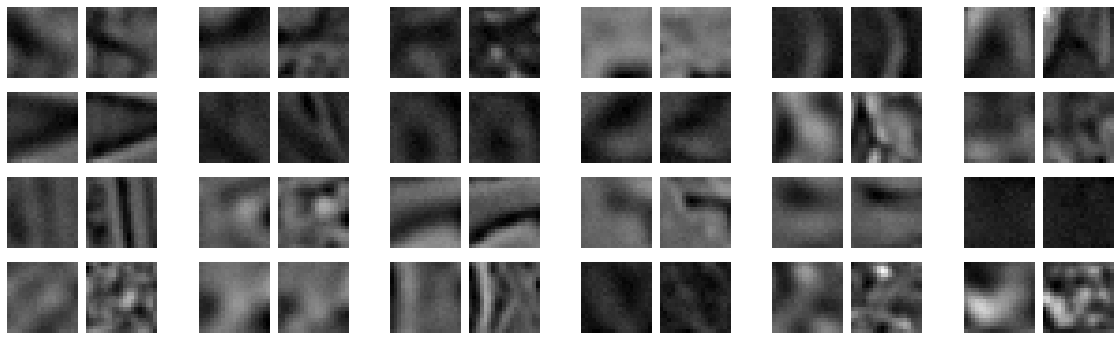

In [2]:
#| label: fig-blurred-inputs
#| fig-cap: A sample of 24 input patches from a refractive amblyopic environment. The amblyopic (blurred) input is the square on the left-hand side of each pair.
sim,X=get_input_patch_examples(blur=2.5)
ims=inputs_to_images(X,buffer=2)
figure(figsize=(20,6))
for i in range(24):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')
    
plt.savefig('Manuscript/resources/fig-blurred-inputs.png')
plt.savefig('Manuscript/resources/fig-blurred-inputs.svg')        
    

## Strabismic amblyopia

Strabismic inputs are modeled by changing the center of the left- and right-input patches in a systematic way, with a set mean offset and a standard deviation per input patch generated.  In this way we can model completely overlapping (i.e. normal) inputs, completely non-overlapping (i.e. extreme strabismus), and any amount of overlap in between.  Some examples are shown in @fig-jitter-inputs with the offset locations shown in @fig-jitter-input-locations.

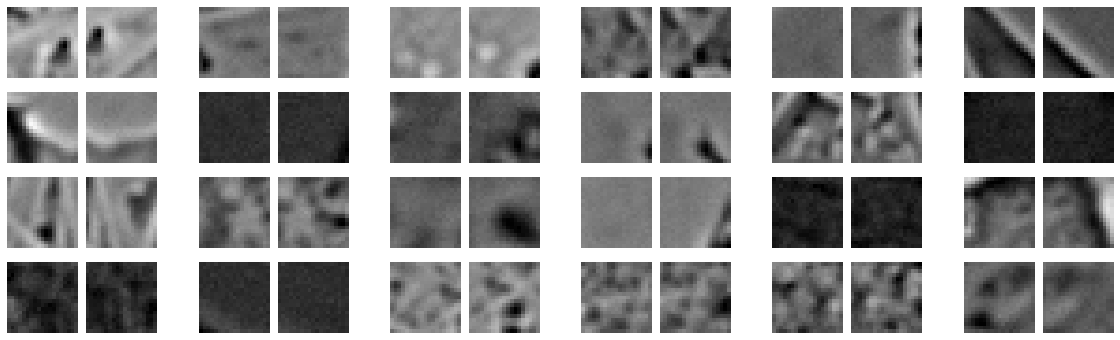

In [3]:
#| label: fig-jitter-inputs
#| fig-cap: A sample of 24 input patches from a strabismic visual environment achieved through random jitter of the amblyopic (left) eye.
#| 
mu_r,mu_c=2,10
sigma_r,sigma_c=1,2

sim,X=get_input_patch_examples_with_jitter(blur=-1,mu_r=mu_r,mu_c=mu_c,sigma_r=sigma_r,sigma_c=sigma_c)
ims=inputs_to_images(X,buffer=2)
figure(figsize=(20,6))
for i in range(24):
    im=ims[i]
    subplot(4,6,i+1)
    imshow(im,cmap=plt.cm.gray)
    axis('off')
    
plt.savefig('Manuscript/resources/fig-jitter-inputs.png')
plt.savefig('Manuscript/resources/fig-jitter-inputs.svg')        
    

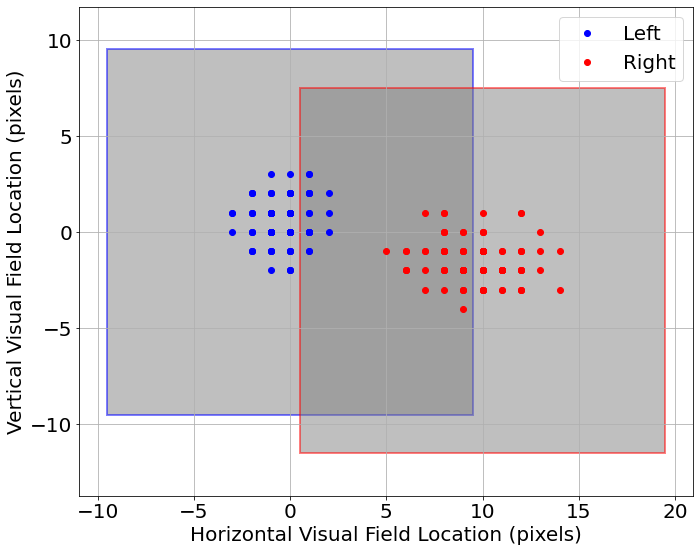

In [4]:
#| label: fig-jitter-input-locations
#| fig-cap: Locations of the center of the left- and right-field of view receptive fields, jittered randomly with set mean and standard deviation.  The average receptive fields are shown as gray squares.
#| 

import matplotlib.patches as patches
ca=sim.monitors['ca'].array()
ra=sim.monitors['ra'].array()
c=sim.monitors['c'].array()
r=sim.monitors['r'].array()

ca_1=sim.monitors['ca_1'].array()
ra_1=sim.monitors['ra_1'].array()
c_1=sim.monitors['c_1'].array()
r_1=sim.monitors['r_1'].array()

figure(figsize=(11,9))
plot(ca-c,-(ra-r),'bo',label='Left')

plot(ca_1-c_1,-(ra_1-r_1),'ro',label='Right')
rect = patches.Rectangle((-19/2, -19/2), 19, 19, linewidth=1, edgecolor='b',lw=2, facecolor='gray',alpha=0.5)
gca().add_patch(rect)
rect = patches.Rectangle((-19/2+mu_c, -19/2-mu_r), 19, 19, linewidth=1, edgecolor='r', lw=2,facecolor='gray',alpha=0.5)
gca().add_patch(rect)
axis('equal');

xlabel('Horizontal Visual Field Location (pixels)')
ylabel('Vertical Visual Field Location (pixels)');
legend();

plt.savefig('Manuscript/resources/fig-jitter-locations.png')
plt.savefig('Manuscript/resources/fig-jitter-locations.svg')        


## Deficit and Measuring the Effectiveness of a Treatment

Figure @fig:y_vs_t_fix_n0 shows the maximum response to oriented stimuli for $n=20$ neurons versus time.  The first 8 days of simulated time define the *deficit* period, where the neurons start in a naïve state with random synaptic weights, and are presented with natural image input blurred in the weak-eye channel as in Section @sec:methods.  Following the deficit, the simulation proceeds into the *fix* period, where the balanced natural image input is restored.  This transition is marked with a red line in Figure @fig:y_vs_t_fix_n0.  We can see only a modest improvement in the deprived-eye responses to the *fix* treatment.  This treatment depends on the noise level presented to the open eye.  In Figure @fig:y_vs_t_fix_n0, that noise level is $\sigma_n = 0$ whereas in Figure @fig:y_vs_t_fix_n1 the noise level is $\sigma_n=1$.  Increasing the open-eye noise results in an improved recovery from the deficit.  

Figure @fig:ODI_vs_t_fix_n1 shows a measurement of this recovery, using the oculur dominance index described in Section @sec:ocular-dominance-index.  Balance responses result in an $\text{ODI}=0$.  As the deficit is increased, so the ODI increases toward 1.  After the fix, with high levels of open-eye noise, the neurons nearly all recover from much of their initial deficit -- the ODI nearly returns to $\text{ODI}=0$.  A simple measure of the effectiveness of the treatment is the *rate* of the recovery of the ODI:

$$
\text{recovery rate}=\frac{ODI_{\text{deficit}}-ODI_{\text{treatment}}}{\text{duration of treatment}}
$$
